In [2]:
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
sns.set_theme(context="talk")

In [3]:
def subj_file(subj_str: str, trial_type: str, data_type: str):
    folder = f"bloodflow_data/{subj_str}"
    filename = None
    files = None
    
    if trial_type in ['baseline', 'base', 'basline']:
        files = [file_name for file_name in os.listdir(folder) if 'baseline' in file_name or 'basline' in file_name or 'base' in file_name]

    elif trial_type in ['post-oc', 'post-occ', 'post-occlusion', 'post']:
        files = [file_name for file_name in os.listdir(folder) if 'post' in file_name]

    else:
        raise ValueError(f"{trial_type} is not an acceptable parameter for trial_type")
    
    if data_type in ['diameter', 'diam']:
        files = [file_name for file_name in files if 'diam' in file_name]
        filename = files[0][:-4]
    elif data_type in ['time', 'time_series', 'time series', 'cyclic'] :
        files = [file_name for file_name in files if 'flow' in file_name or 'doppler' in file_name]
        filename = files[0][:str.index(files[0], '_')]
        
    else:
        raise ValueError(f"{data_type} is not an acceptable parameter for data_type")
    
    return f"{folder}/{filename}"

In [4]:
def get_matlab_data(filename: str):
    matlab_data = sp.io.loadmat(f"{filename}.fig")[
        "hgS_070000"]["children"][0][0][0]["children"][0][0][0]["properties"]["YData"][0][0][0]
    
    matlab_data[matlab_data == -1] = np.NaN
    return matlab_data

In [5]:
subj_file("ASCI005", "baseline", 'diameter')

'bloodflow_data/ASCI005/ASCI005 baseline long diam 20201001133850785'

In [10]:
load(subj_file)

TypeError: ('(subj_file) is neither a string nor a macro.', <function subj_file at 0x0000016FA73CD940>)

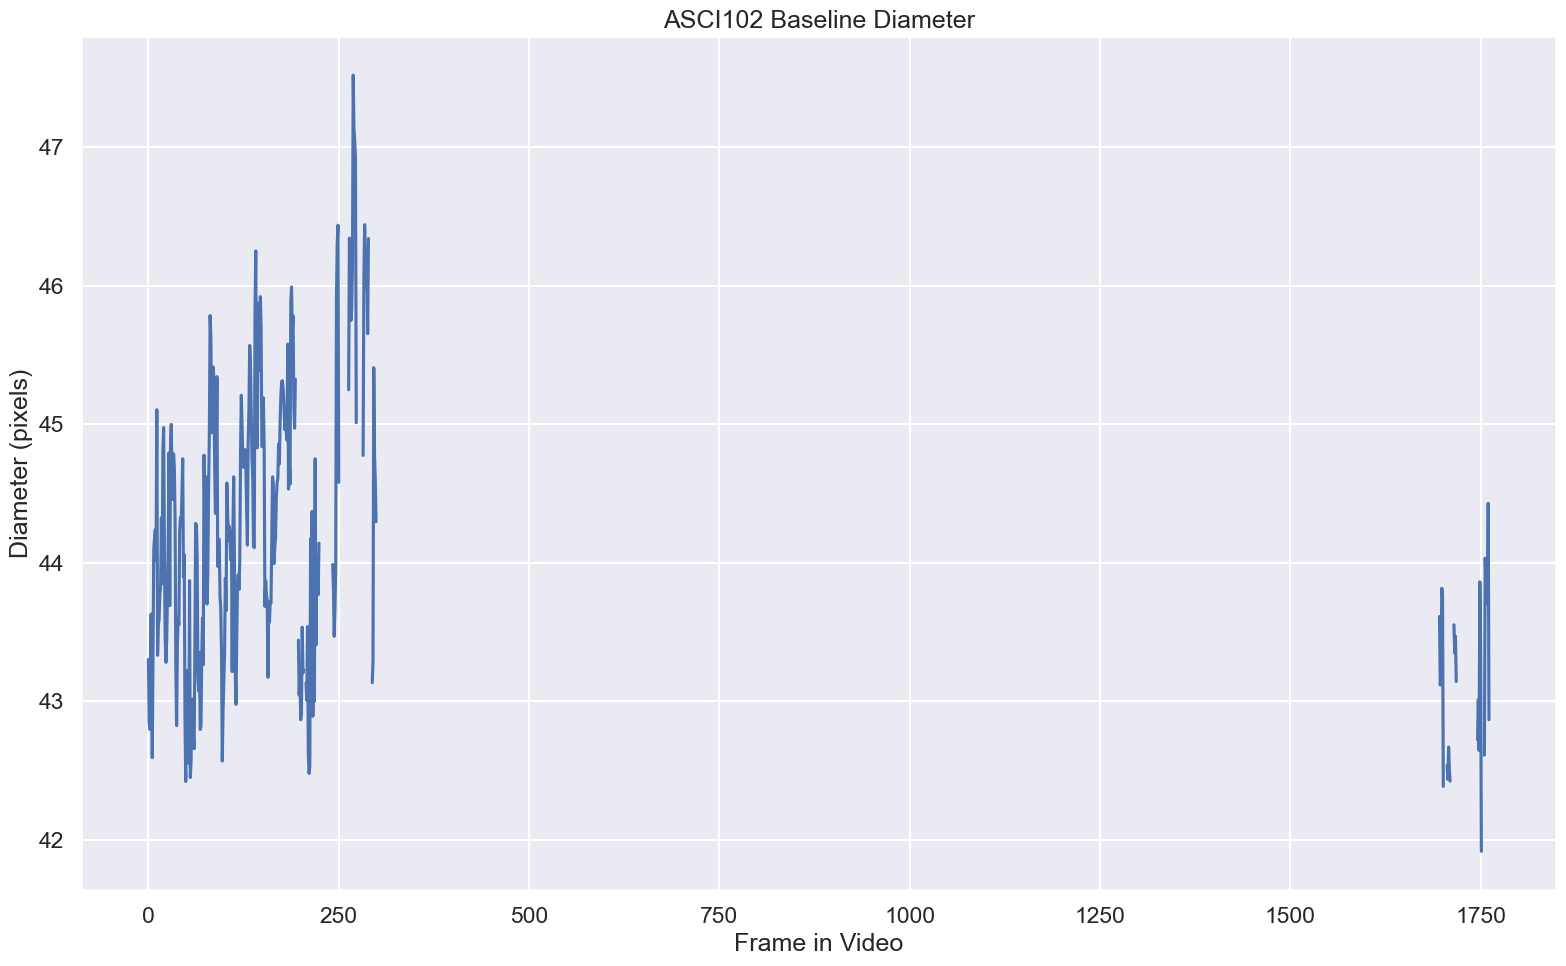

In [6]:
subj_name = "ASCI102"
plt.figure(figsize=(16,10))
diameter = get_matlab_data(subj_file(subj_name, 'post', 'diam'))
# diameter = get_matlab_data("presentation_plots/flowave_ASCI021_baseline_3")
plt.plot(diameter)
plt.title(f"{subj_name} Baseline Diameter")
plt.ylabel("Diameter (pixels)")
plt.xlabel("Frame in Video")
plt.tight_layout()

In [7]:
np.nanmean(diameter)

44.191807065240226

In [8]:
len(diameter)

1776

In [9]:
nan_num = np.count_nonzero(np.isnan(diameter))

print(f"Number of Frames Read: {(1 - (nan_num / len(diameter)) ) * 100}%")

Number of Frames Read: 15.934684684684687%
